        Data  Fechamento
0 2023-01-02  100.998379
1 2023-01-03  100.719476
2 2023-01-04  102.032660
3 2023-01-05  105.188455
4 2023-01-06  104.697002
Média móvel de 20 dias:
           Data  Fechamento  Media_Movel_20
19  2023-01-27   93.377532      103.178254
20  2023-01-30   96.155218      102.936096
21  2023-01-31   95.722005      102.686223
22  2023-02-01   95.851371      102.377158
23  2023-02-02   93.158637      101.775667
..         ...         ...             ...
247 2023-12-13   94.599004       97.930086
248 2023-12-14   97.998878       97.955046
249 2023-12-15   98.795856       97.953142
250 2023-12-18   96.335606       97.899886
251 2023-12-19   98.120393       97.914741

[233 rows x 3 columns]
Tendência:
           Data  Fechamento  Media_Movel_50  Media_Movel_200  Tendencia
199 2023-10-06   84.951994       85.357026        85.646073  -0.289048
200 2023-10-09   85.562070       85.498109        85.568892  -0.070783
201 2023-10-10   86.527109       85.647575        85.497930 

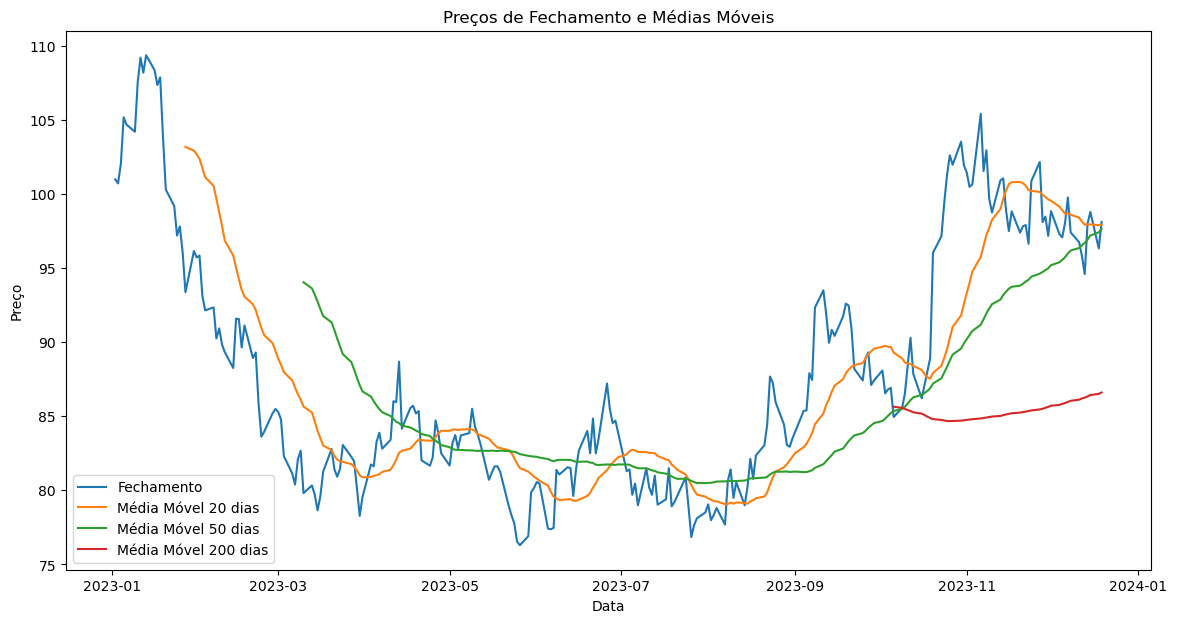

In [25]:
import numpy as np
import pandas as pd

#seleciona uma seeed de dados para simulação
np.random.seed(42)
precos_simulados = np.random.lognormal(mean=0, sigma=0.02, size=252).cumprod() * 100

#variáves data e df com valores e datas.
data = pd.date_range(start='01/01/2023', periods=252, freq='B')
df = pd.DataFrame({'Data':data,'Fechamento':precos_simulados})
print(df.head())

# retornos diários
df['Retornos'] = df['Fechamento'].pct_change()

# média móvel de 20 dias
df['Media_Movel_20'] = df['Fechamento'].rolling(window=20).mean()
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
print('Média móvel de 20 dias:\n', df[['Data', 'Fechamento', 'Media_Movel_20']].dropna())

volatilidade_diaria = df['Retornos'].std()
volatilidade_anualizada = volatilidade_diaria * np.sqrt(252)

df['Media_Movel_50'] = df['Fechamento'].rolling(window=50).mean()
df['Media_Movel_200'] = df['Fechamento'].rolling(window=200).mean()
df['Tendencia'] = df['Media_Movel_50'] - df['Media_Movel_200']
print("Tendência:\n", df[['Data', 'Fechamento', 'Media_Movel_50', 'Media_Movel_200', 'Tendencia']].dropna())

print("Volatilidade Anualizada:", volatilidade_anualizada)

print(df.tail())

# imprime o gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(df['Data'], df['Fechamento'], label='Fechamento')
plt.plot(df['Data'], df['Media_Movel_20'], label='Média Móvel 20 dias')
plt.plot(df['Data'], df['Media_Movel_50'], label='Média Móvel 50 dias')
plt.plot(df['Data'], df['Media_Movel_200'], label='Média Móvel 200 dias')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Preços de Fechamento e Médias Móveis')
plt.legend()
plt.show()